In [1]:
import pickle
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.dates as mdates
import h5py
from datetime import datetime, date, timedelta

In [22]:
alldate = []

for i, pklpath in enumerate(glob.glob('../DataBase/PAM_pickle/Keelung_060909-062522-30min.pkl.pkl')):
    file = open(pklpath, 'rb')
    array = pickle.load(file)
    freq = array['freq']
    file.close()
    alldate.extend(array['time'])
    if i == 0 :
        newarray = array['50pct']
    else:
        newarray = np.hstack((newarray, array['50pct']))
    print(newarray.shape)
# ra, col = newarray.shape
# base = datetime(2023, 6, 8, 8, 0, 0)
# alldate = [base + timedelta(minutes = 30*x) for x in range(col)]

dict_keys(['time', 'freq', '95pct', '50pct', '25pct', '05pct', 'Mean'])

### PSD

/var/folders/l2/zyrmtcyj7zn13lz9xk4l96zw0000gn/T/ipykernel_27785/167281515.py:8: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  plt.plot(freq, np.percentile(array['95pct'], 100, axis=1, interpolation='midpoint'), 'r', lw=1)
/var/folders/l2/zyrmtcyj7zn13lz9xk4l96zw0000gn/T/ipykernel_27785/167281515.py:9: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  plt.plot(freq, np.percentile(array['50pct'], 100, axis=1, interpolation='midpoint'), 'k' , lw=3)
/var/folders/l2/zyrmtcyj7zn13lz9xk4l96zw0000gn/T/ipykernel_27785/167281515.py:10: DeprecationWarning: the `interpolation=` argument t

(1, 48000)

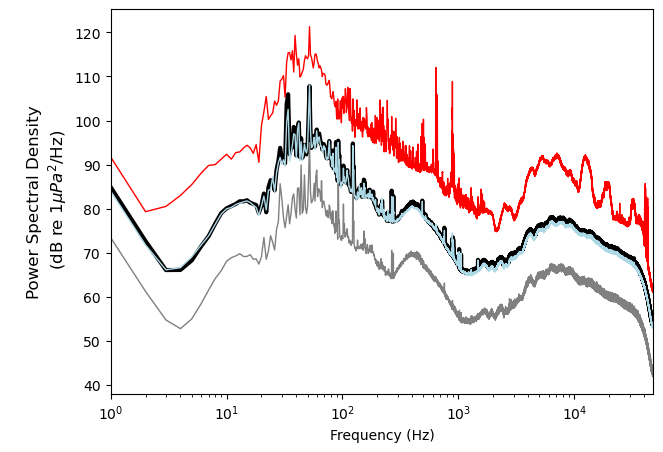

In [37]:
freqarray95 = []
freqarray50 = []
freqarray05 = []
freqarrayM = []
    
plt.figure(figsize=(7,5))

plt.plot(freq, np.percentile(array['95pct'], 100, axis=1, interpolation='midpoint'), 'r', lw=1)
plt.plot(freq, np.percentile(array['50pct'], 100, axis=1, interpolation='midpoint'), 'k' , lw=3)
plt.plot(freq, np.percentile(array['05pct'], 100, axis=1, interpolation='midpoint'), 'grey', lw=1)
plt.plot(freq, np.percentile(array['Mean'],  100, axis=1, interpolation='midpoint'), 'lightblue', lw=1)
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('\nPower Spectral Density\n (dB re 1'r'$\mu Pa^2$/Hz)', fontsize=12)
plt.xlim(1,48000)

### Spectrogram

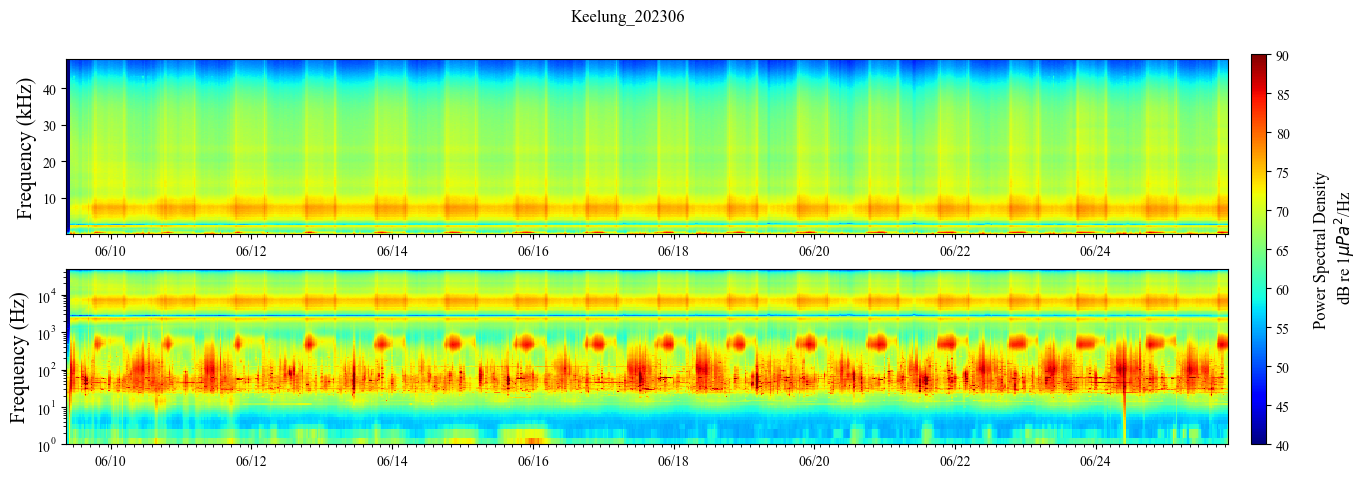

In [25]:
fig, ax = plt.subplots(2,1, figsize=(15, 5))
plt.rcParams["font.family"] = "Times New Roman"

vmin = 40
vmax = 90
cmap = cm.jet
#========================================================



ax1 = ax[1].pcolormesh(alldate, np.array(freq), newarray, cmap=cmap, vmin=vmin, vmax=vmax)
ax[1].set_yscale('log')
ax[1].set_ylabel('Frequency (Hz)', fontsize=15)
ax[1].set_ylim(min(freq),max(freq))


ax2 = ax[0].pcolormesh(alldate, np.array(freq)/1000, newarray, cmap=cmap, vmin=vmin, vmax=vmax) 
ax[0].set_ylabel('Frequency (kHz)', fontsize=15)
ax[0].set_ylim(min(freq)/1000,max(freq)/1000)



cax = fig.add_axes([ax[1].get_position().x1+0.015, ax[1].get_position().y0, 0.01, ax[0].get_position().y0+0.25])
cbar = fig.colorbar(ax1, ax=ax[:], pad=0.02, cax=cax)
# cbar = plt.colorbar(ax1)
# cbar.ax.set_yticklabels()

cbar.set_label('\nPower Spectral Density\n dB re 1'r'$\mu Pa^2$/Hz', fontsize=12)
cbar.set_ticks(range(vmin,vmax+1,5))


ax[0].xaxis.set_major_locator(mdates.DayLocator(interval=2))   #to get a tick every 15 minutes
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))     #optional formatting 
ax[0].xaxis.set_minor_locator(mdates.HourLocator(interval=3))   #to get a tick every 15 minutes

ax[1].xaxis.set_major_locator(mdates.DayLocator(interval=2))   #to get a tick every 15 minutes
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax[1].xaxis.set_minor_locator(mdates.HourLocator(interval=3))   #to get a tick every 15 minutes

plt.suptitle('Keelung_202306', fontsize=12)
plt.savefig('../Results/spectrogram/Keelung_202306_all.png',dpi=500)
# plt.suptitle('Taoyuan_202306', fontsize=12)
# plt.savefig('../Results/spectrogram/Taoyuan_202306_all.png',dpi=500)

# plt.suptitle('Taoyuan_202304', fontsize=12)
# plt.savefig('../Results/spectrogram/Taoyuan_202304_all_change_cbar.png',dpi=500)

In [59]:
dsun = pd.read_csv('../DataBase/Data_CWA/sunset_time_taoyuan2023.csv')

In [60]:
dsun.head()

,TIME,SUNRSET,SUNSET
0,2023-04-01,5:48,18:12
1,2023-04-02,5:47,18:12
2,2023-04-03,5:46,18:13
3,2023-04-04,5:45,18:13
4,2023-04-05,5:44,18:14


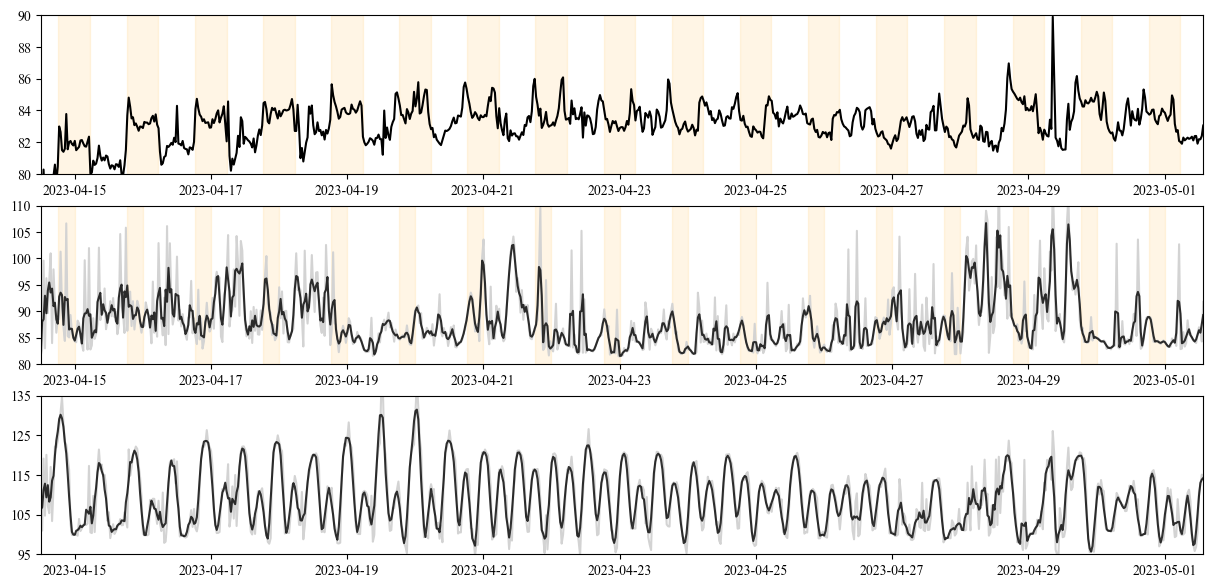

In [65]:
from scipy.signal import savgol_filter

plt.figure(figsize=(15,7))
ymin = 80
ymax = 90
plt.subplot(311)
for day in range(14,31,1):
# for day in range(8,27,1):
    if day == 31: 
        day = 1; month = 5
    else:
        month = 4

    if day != 30:

        sunset = int((dsun['SUNSET'][dsun['TIME']==f'2023-{str(month).zfill(2)}-{str(day).zfill(2)}'].values[0]).rsplit(':')[-1])
        sunrset = int((dsun['SUNRSET'][dsun['TIME']==f'2023-{str(month).zfill(2)}-{str(day+1).zfill(2)}'].values[0]).rsplit(':')[-1])
        plt.fill_betweenx(y=[ymin,ymax], x1=datetime(2023, month,day,18,sunset), x2=datetime(2023,month,day+1,5,sunrset), color='orange', alpha=0.1)
    # plt.fill_betweenx(y=[ymin,ymax], x1=datetime(2023, 6,day,18, 40), x2=datetime(2023,6,day+1,5,3), color='orange', alpha=0.1)
    else:

        sunset = int((dsun['SUNSET'][dsun['TIME']==f'2023-{str(month).zfill(2)}-{str(day).zfill(2)}'].values[0]).rsplit(':')[-1])
        sunrset = int((dsun['SUNRSET'][dsun['TIME']==f'2023-05-01'].values[0]).rsplit(':')[-1])
        plt.fill_betweenx(y=[ymin,ymax], x1=datetime(2023,month,day,18,sunset), x2=datetime(2023, int(month)+1,1,5,sunrset), color='orange', alpha=0.1)
plt.plot(alldate,np.max(newarray[3000:30000, :], axis=0), 'k')
plt.xlim(alldate[0], alldate[-1])
plt.ylim(ymin,ymax)
plt.yticks(range(ymin,ymax+1,2))

plt.subplot(312)
ymin = 80
ymax = 110
for day in range(14,31,1):
# for day in range(8,27,1):
    if day == 31: 
        day = 1; month = 5
    else:
        month = 4
    # plt.fill_betweenx(y=[ymin,ymax], x1=datetime(2023, 6,day,18, 40), x2=datetime(2023,6,day+1,5,3), color='orange', alpha=0.1)
    if day != 30:

        sunset = int((dsun['SUNSET'][dsun['TIME']==f'2023-{str(month).zfill(2)}-{str(day).zfill(2)}'].values[0]).rsplit(':')[-1])
        sunrset = int((dsun['SUNRSET'][dsun['TIME']==f'2023-{str(month).zfill(2)}-{str(day+1).zfill(2)}'].values[0]).rsplit(':')[-1])
        plt.fill_betweenx(y=[ymin,ymax], x1=datetime(2023, month,day,18,sunset), x2=datetime(2023,month,day+1,0,0), color='orange', alpha=0.1)
    else:

        sunset = int((dsun['SUNSET'][dsun['TIME']==f'2023-{str(month).zfill(2)}-{str(day).zfill(2)}'].values[0]).rsplit(':')[-1])
        sunrset = int((dsun['SUNRSET'][dsun['TIME']==f'2023-05-01'].values[0]).rsplit(':')[-1])
        plt.fill_betweenx(y=[ymin,ymax], x1=datetime(2023,month,day,18,sunset), x2=datetime(2023, int(month)+1,1,0,0), color='orange', alpha=0.1)
plt.plot(alldate,np.max(newarray[300:2000, :], axis=0), 'lightgrey')
plt.plot(alldate,savgol_filter(np.max(newarray[300:2000, :], axis=0), window_length=3, polyorder=1, mode='nearest'),'k', alpha=0.8)
plt.xlim(alldate[0], alldate[-1])
plt.ylim(ymin,ymax)
plt.yticks(range(ymin,ymax+1,5))

plt.subplot(313)
ymin = 95
ymax = 135
# for day in range(8,25,1):
    # plt.fill_betweenx(y=[ymin,ymax], x1=datetime(2023,6,day,5,3), x2=datetime(2023,6,day,18,40), color='lightblue', alpha=0.15)
plt.plot(alldate,np.max(newarray[1:200, :], axis=0), 'lightgrey')
plt.plot(alldate,savgol_filter(np.max(newarray[1:200, :], axis=0), window_length=4, polyorder=1, mode='nearest'),'k', alpha=0.8)
plt.xlim(alldate[0], alldate[-1])
plt.yticks(range(ymin, ymax+1,10))
plt.ylim(ymin, ymax)

plt.savefig('../Results/spectrogram/Taoyuan_202304_pattern.png', dpi=300)